In [8]:
import pandas as pd
import numpy as np
import xarray as xr

In [2]:
path = "../datos/"
fname_tmn = "cru_ts4.03.1901.2018.tmn.dat.nc"
fname_tmx = "cru_ts4.03.1901.2018.tmx.dat.nc"

In [3]:
with xr.load_dataset(path + fname_tmn) as ds:
    tmn_df = ds.drop("stn").mean("lat").mean("lon").to_pandas()
with xr.load_dataset(path + fname_tmx) as ds:
    tmx_df = ds.drop("stn").mean("lat").mean("lon").to_pandas()

,tmn,tmx,tm
time,,,
1901-01-16,-12.094838,-0.975396,-6.535117
1901-02-15,-10.471357,0.906321,-4.782518
1901-03-16,-7.427137,4.478341,-1.474398
1901-04-16,-2.030874,9.801553,3.885339
1901-05-16,3.723201,14.925296,9.324248
...,...,...,...
2018-08-16,10.220017,20.893505,15.556761
2018-09-16,6.938321,17.572874,12.255597
2018-10-16,2.729573,12.445281,7.587427


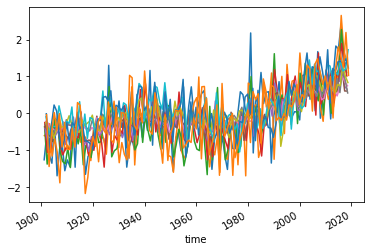

In [40]:
clim = pd.concat([tmn_df, tmx_df], axis = 1)
clim["tm"] = (clim.tmn + clim.tmx) / 2

clim_prom = clim.tm[(clim.index > "1970") & (clim.index < "2001")]

prom = clim_prom.groupby(clim_prom.index.month).mean()

clim["anomaly"] = np.nan

for i in range(1, 13):
    clim.loc[clim.index.month == i, "anomaly"] = (
        clim.tm[clim.index.month == i] - prom.iat[i - 1])

<AxesSubplot:xlabel='time'>

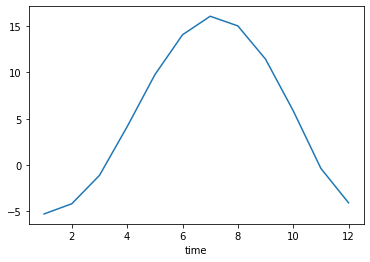

In [46]:
prom.plot()

In [47]:
clim.anomaly.plot()

KeyError: 'anomaly'